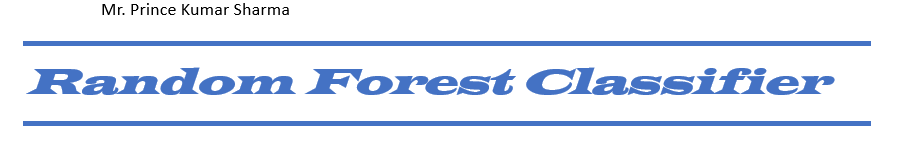

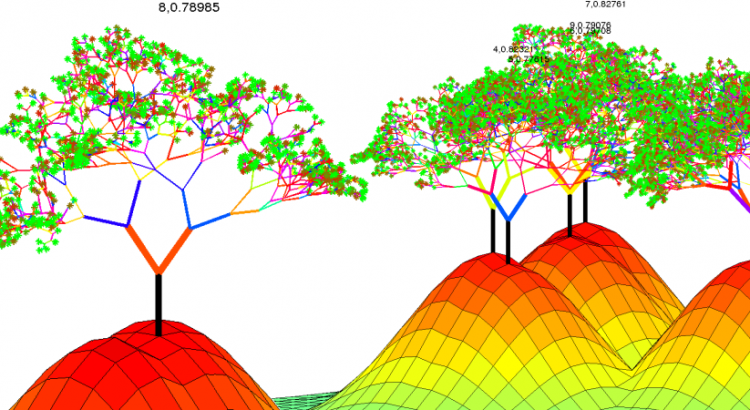

# Random Forest
* Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

* As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

## Why use Random Forest?
* Below are some points that explain why we should use the Random Forest algorithm:

1. It takes less training time as compared to other algorithms.
2. It predicts output with high accuracy, even for the large dataset it runs efficiently.
3. It can also maintain accuracy when a large proportion of data is missing.
## How does Random Forest algorithm work?
* Random Forest works in two-phase first is to create the random forest by combining N decision tree, and second is to make predictions for each tree created in the first phase.

* The Working process can be explained in the below steps and diagram:

Step-1: Select random K data points from the training set.

Step-2: Build the decision trees associated with the selected data points (Subsets).

Step-3: Choose the number N for decision trees that you want to build.

Step-4: Repeat Step 1 & 2.

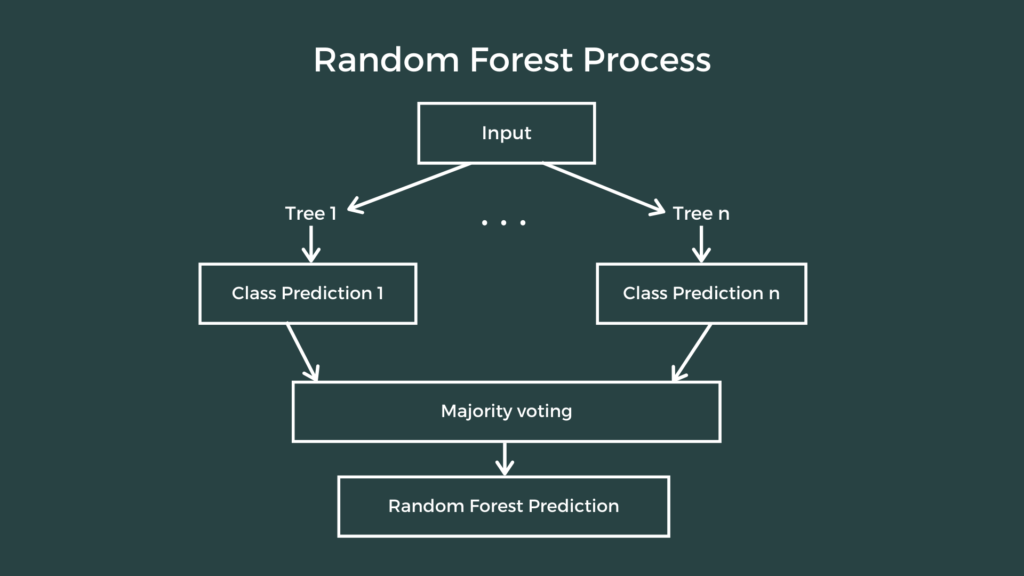

## Applications of Random Forest
* There are mainly four sectors where Random forest mostly used:

1. Banking: Banking sector mostly uses this algorithm for the identification of loan risk.
2. Medicine: With the help of this algorithm, disease trends and risks of the disease can be identified.
3. Land Use: We can identify the areas of similar land use by this algorithm.
4. Marketing: Marketing trends can be identified using this algorithm.
## Advantages of Random Forest
Random Forest is capable of performing both Classification and Regression tasks.
1. It is capable of handling large datasets with high dimensionality.
2. It enhances the accuracy of the model and prevents the overfitting issue.
## Disadvantages of Random Forest
Although random forest can be used for both classification and regression tasks, it is not more suitable for Regression tasks.

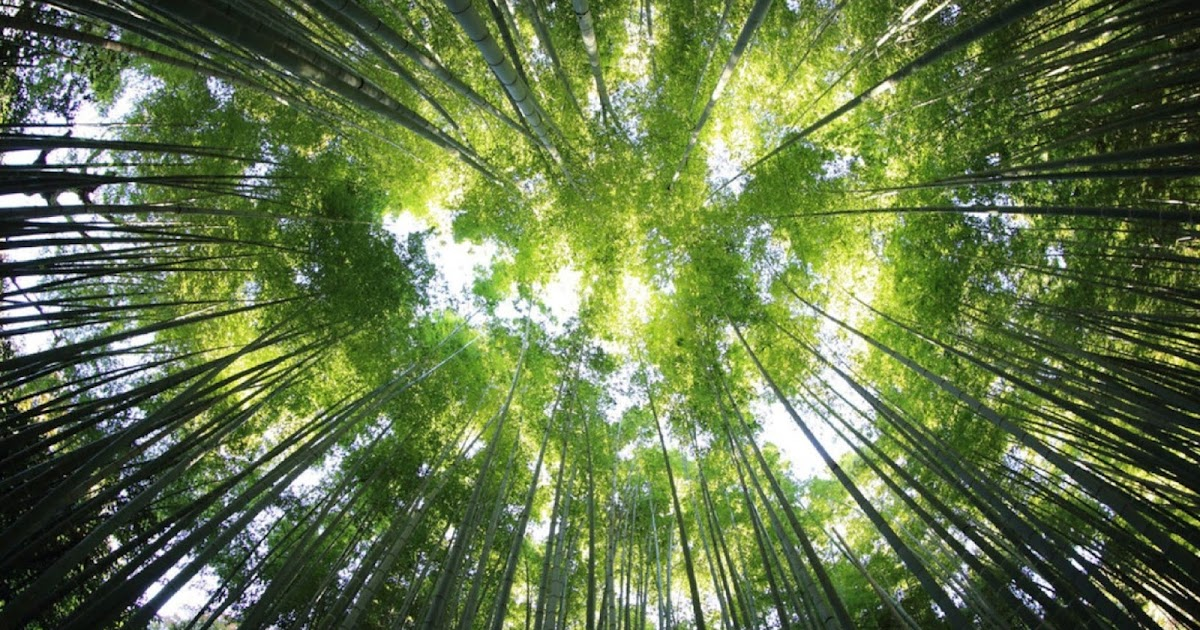

# Bagging Technique
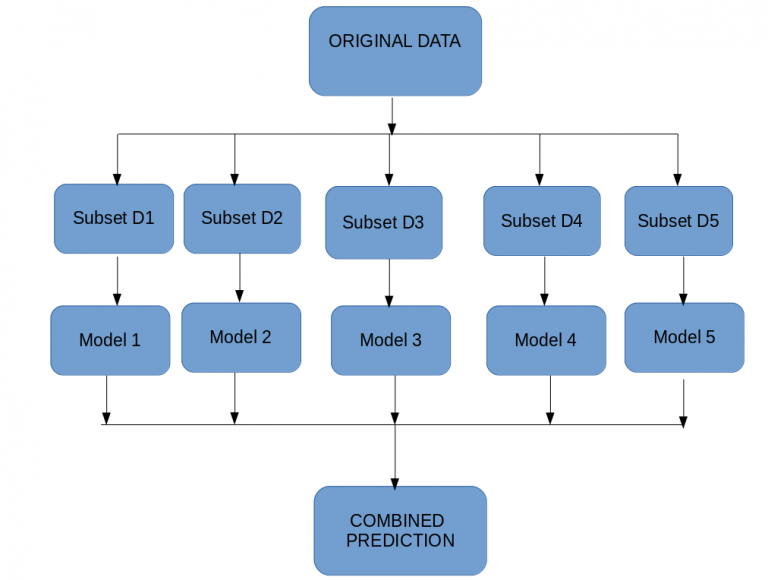

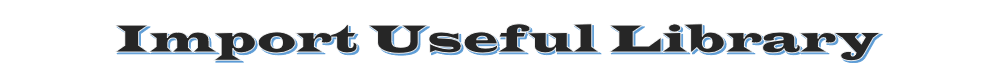

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mns
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,f1_score
sns.set_theme(style="dark",palette="rainbow")

In [4]:
df=pd.read_csv("C:/Users/Prince kumar/OneDrive/Desktop/mldataset/breast-cancer-wisconsin.data.csv")

In [5]:
df

,id,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
df.shape

(699, 11)

In [7]:
df.describe()

,id,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bland_chrom,norm_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   climp_thickness         699 non-null    int64 
 2   unif_cell_size          699 non-null    int64 
 3   unif_cell_shape         699 non-null    int64 
 4   marg_adhesion           699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chrom             699 non-null    int64 
 8   norm_nucleoli           699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [9]:
df.isna().sum()

id                        0
climp_thickness           0
unif_cell_size            0
unif_cell_shape           0
marg_adhesion             0
single_epith_cell_size    0
bare_nuclei               0
bland_chrom               0
norm_nucleoli             0
mitoses                   0
class                     0
dtype: int64

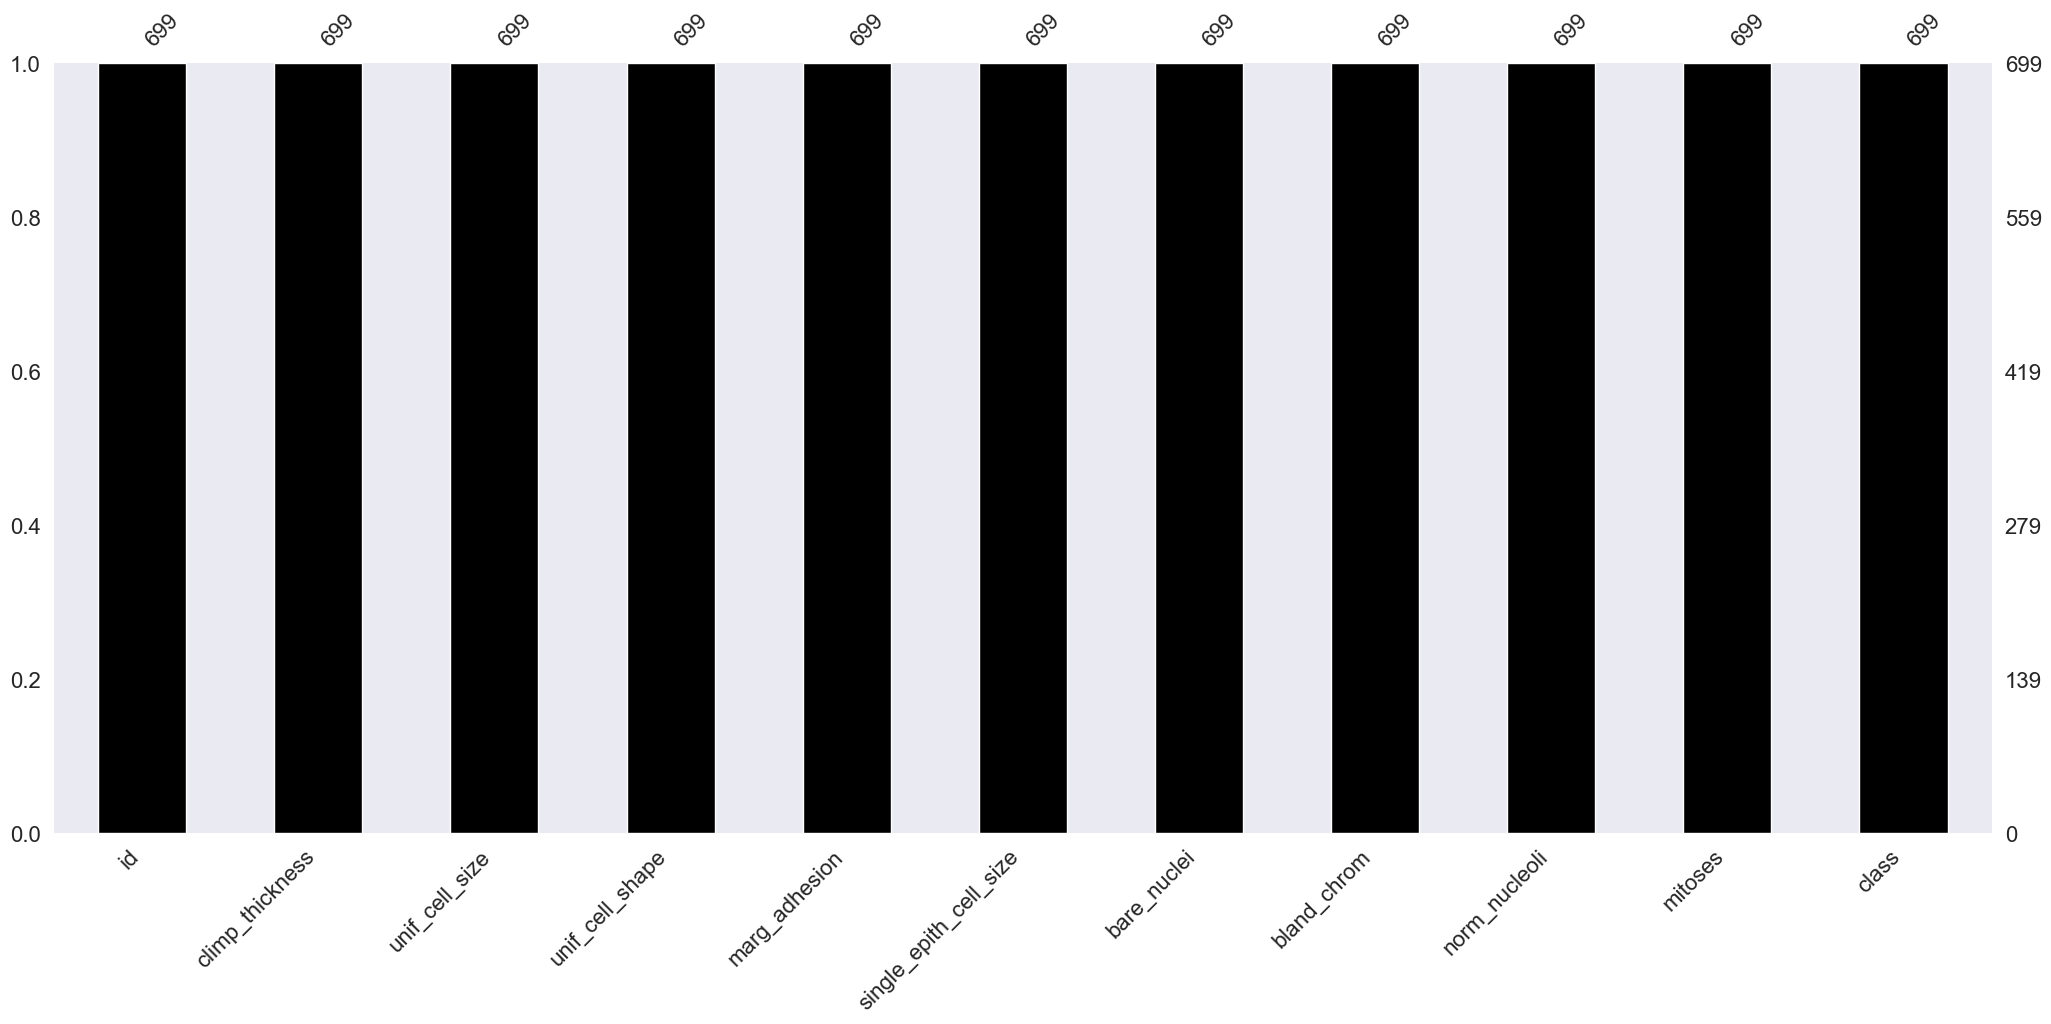

In [10]:
mns.bar(df,labels=True,color="black");

In [11]:
df.head()

,id,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [12]:
df.drop(columns="id",inplace=True)

In [13]:
df.head()

,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [14]:
df.tail()

,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   climp_thickness         699 non-null    int64 
 1   unif_cell_size          699 non-null    int64 
 2   unif_cell_shape         699 non-null    int64 
 3   marg_adhesion           699 non-null    int64 
 4   single_epith_cell_size  699 non-null    int64 
 5   bare_nuclei             699 non-null    object
 6   bland_chrom             699 non-null    int64 
 7   norm_nucleoli           699 non-null    int64 
 8   mitoses                 699 non-null    int64 
 9   class                   699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [16]:
df.nunique()

climp_thickness           10
unif_cell_size            10
unif_cell_shape           10
marg_adhesion             10
single_epith_cell_size    10
bare_nuclei               11
bland_chrom               10
norm_nucleoli             10
mitoses                    9
class                      2
dtype: int64

In [17]:
df["bare_nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [18]:
df["bare_nuclei"]=df["bare_nuclei"].replace("?",1).astype(int)

In [19]:
df["bare_nuclei"].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

In [20]:
df.head()

,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   climp_thickness         699 non-null    int64
 1   unif_cell_size          699 non-null    int64
 2   unif_cell_shape         699 non-null    int64
 3   marg_adhesion           699 non-null    int64
 4   single_epith_cell_size  699 non-null    int64
 5   bare_nuclei             699 non-null    int32
 6   bland_chrom             699 non-null    int64
 7   norm_nucleoli           699 non-null    int64
 8   mitoses                 699 non-null    int64
 9   class                   699 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 52.0 KB


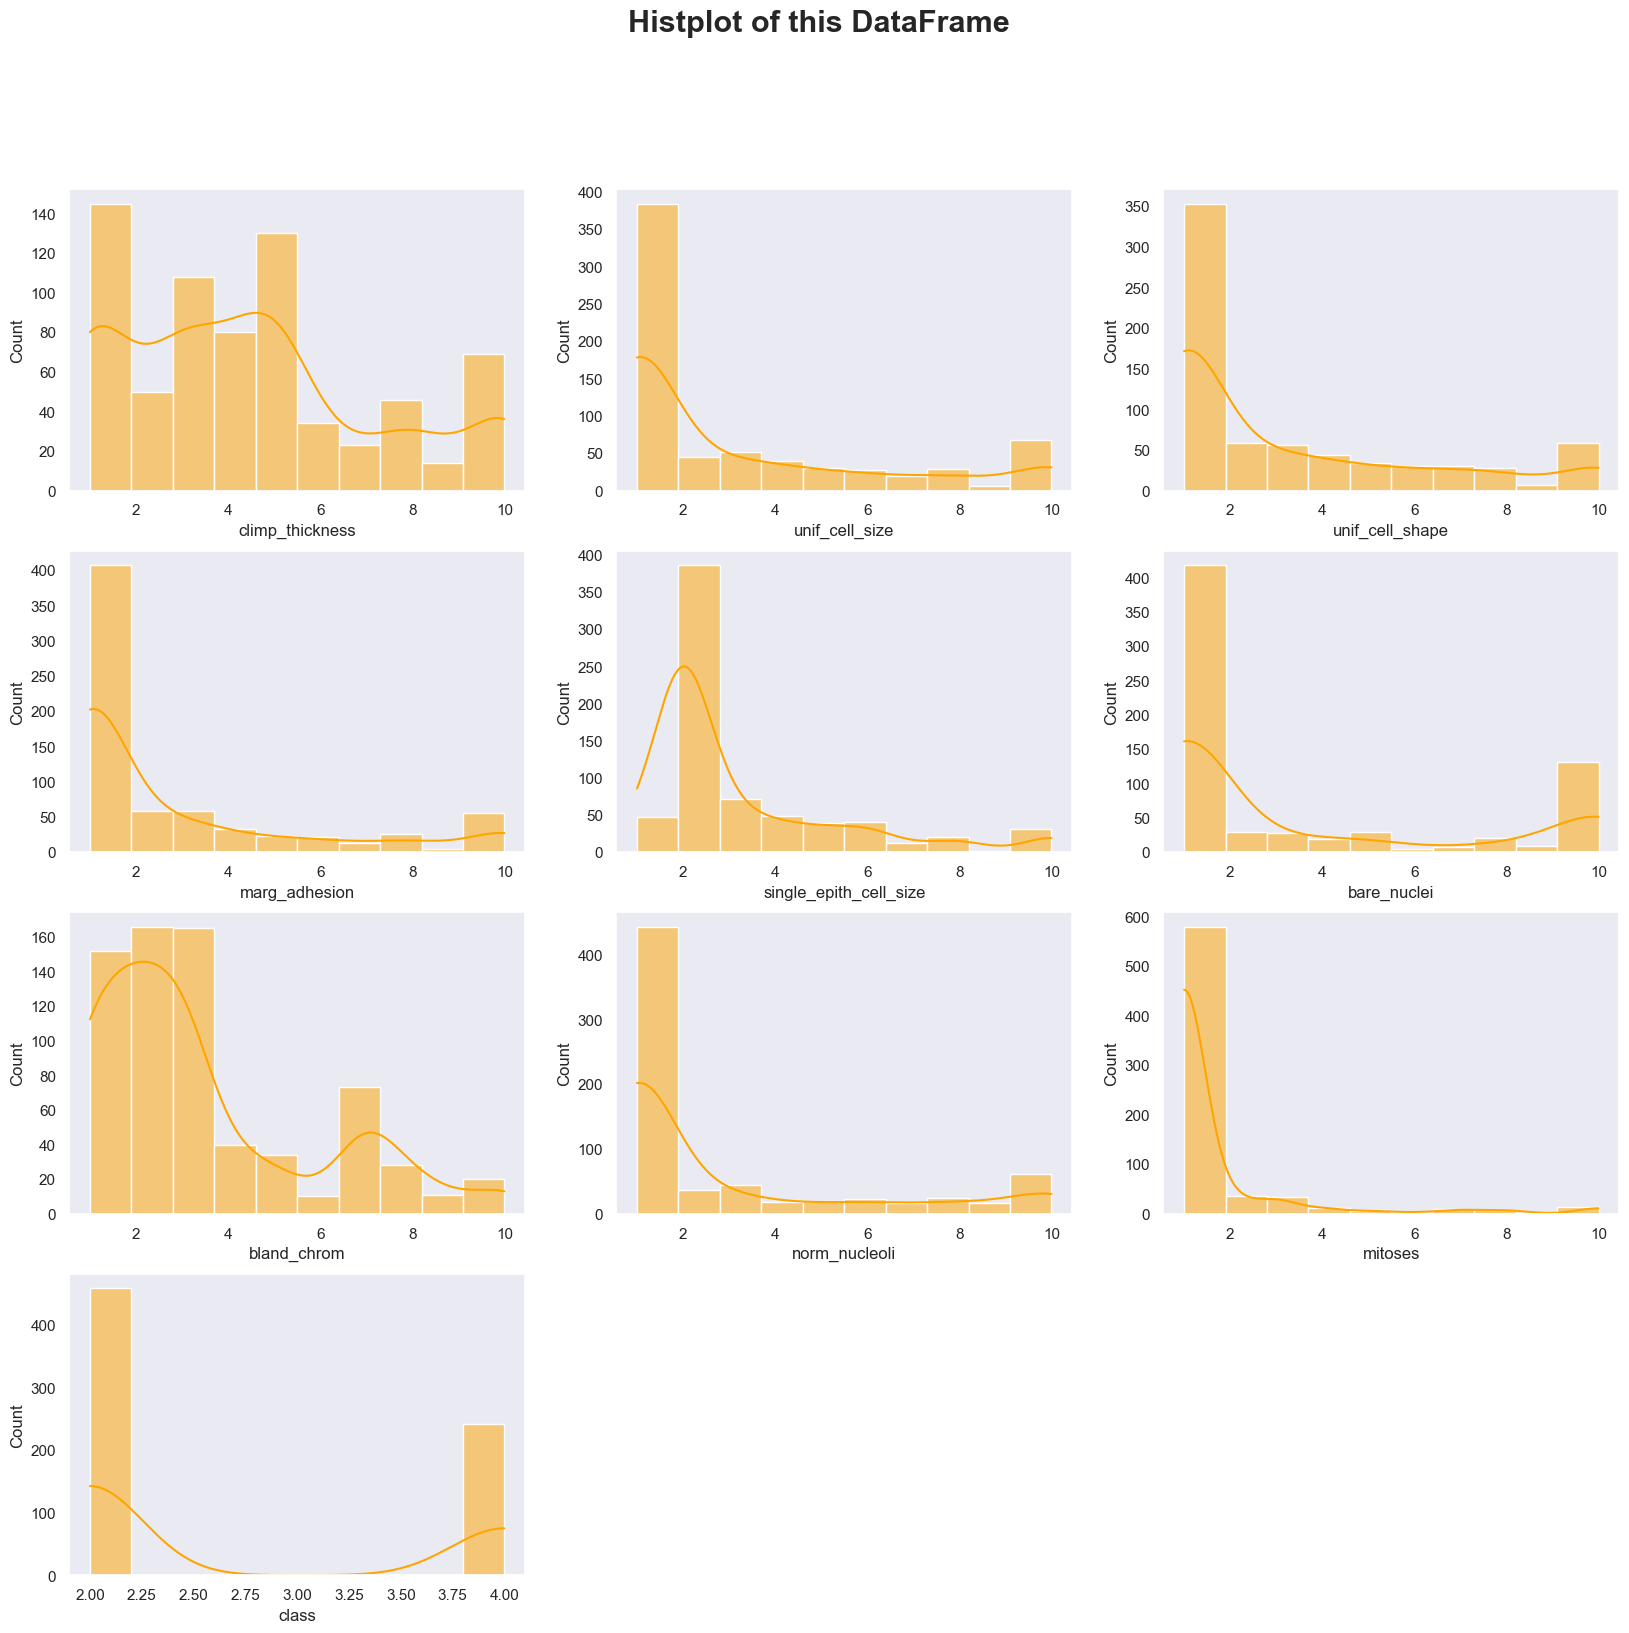

In [22]:
plt.figure(figsize=(20,18))
for i,j in enumerate(df):
    plt.subplot(4,3,i+1)
    sns.histplot(data=df,x=j,kde=True,bins=10,color="orange")
plt.suptitle("Histplot of this DataFrame",fontweight="bold",fontsize=22)
plt.show()

In [23]:
df.tail()

,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


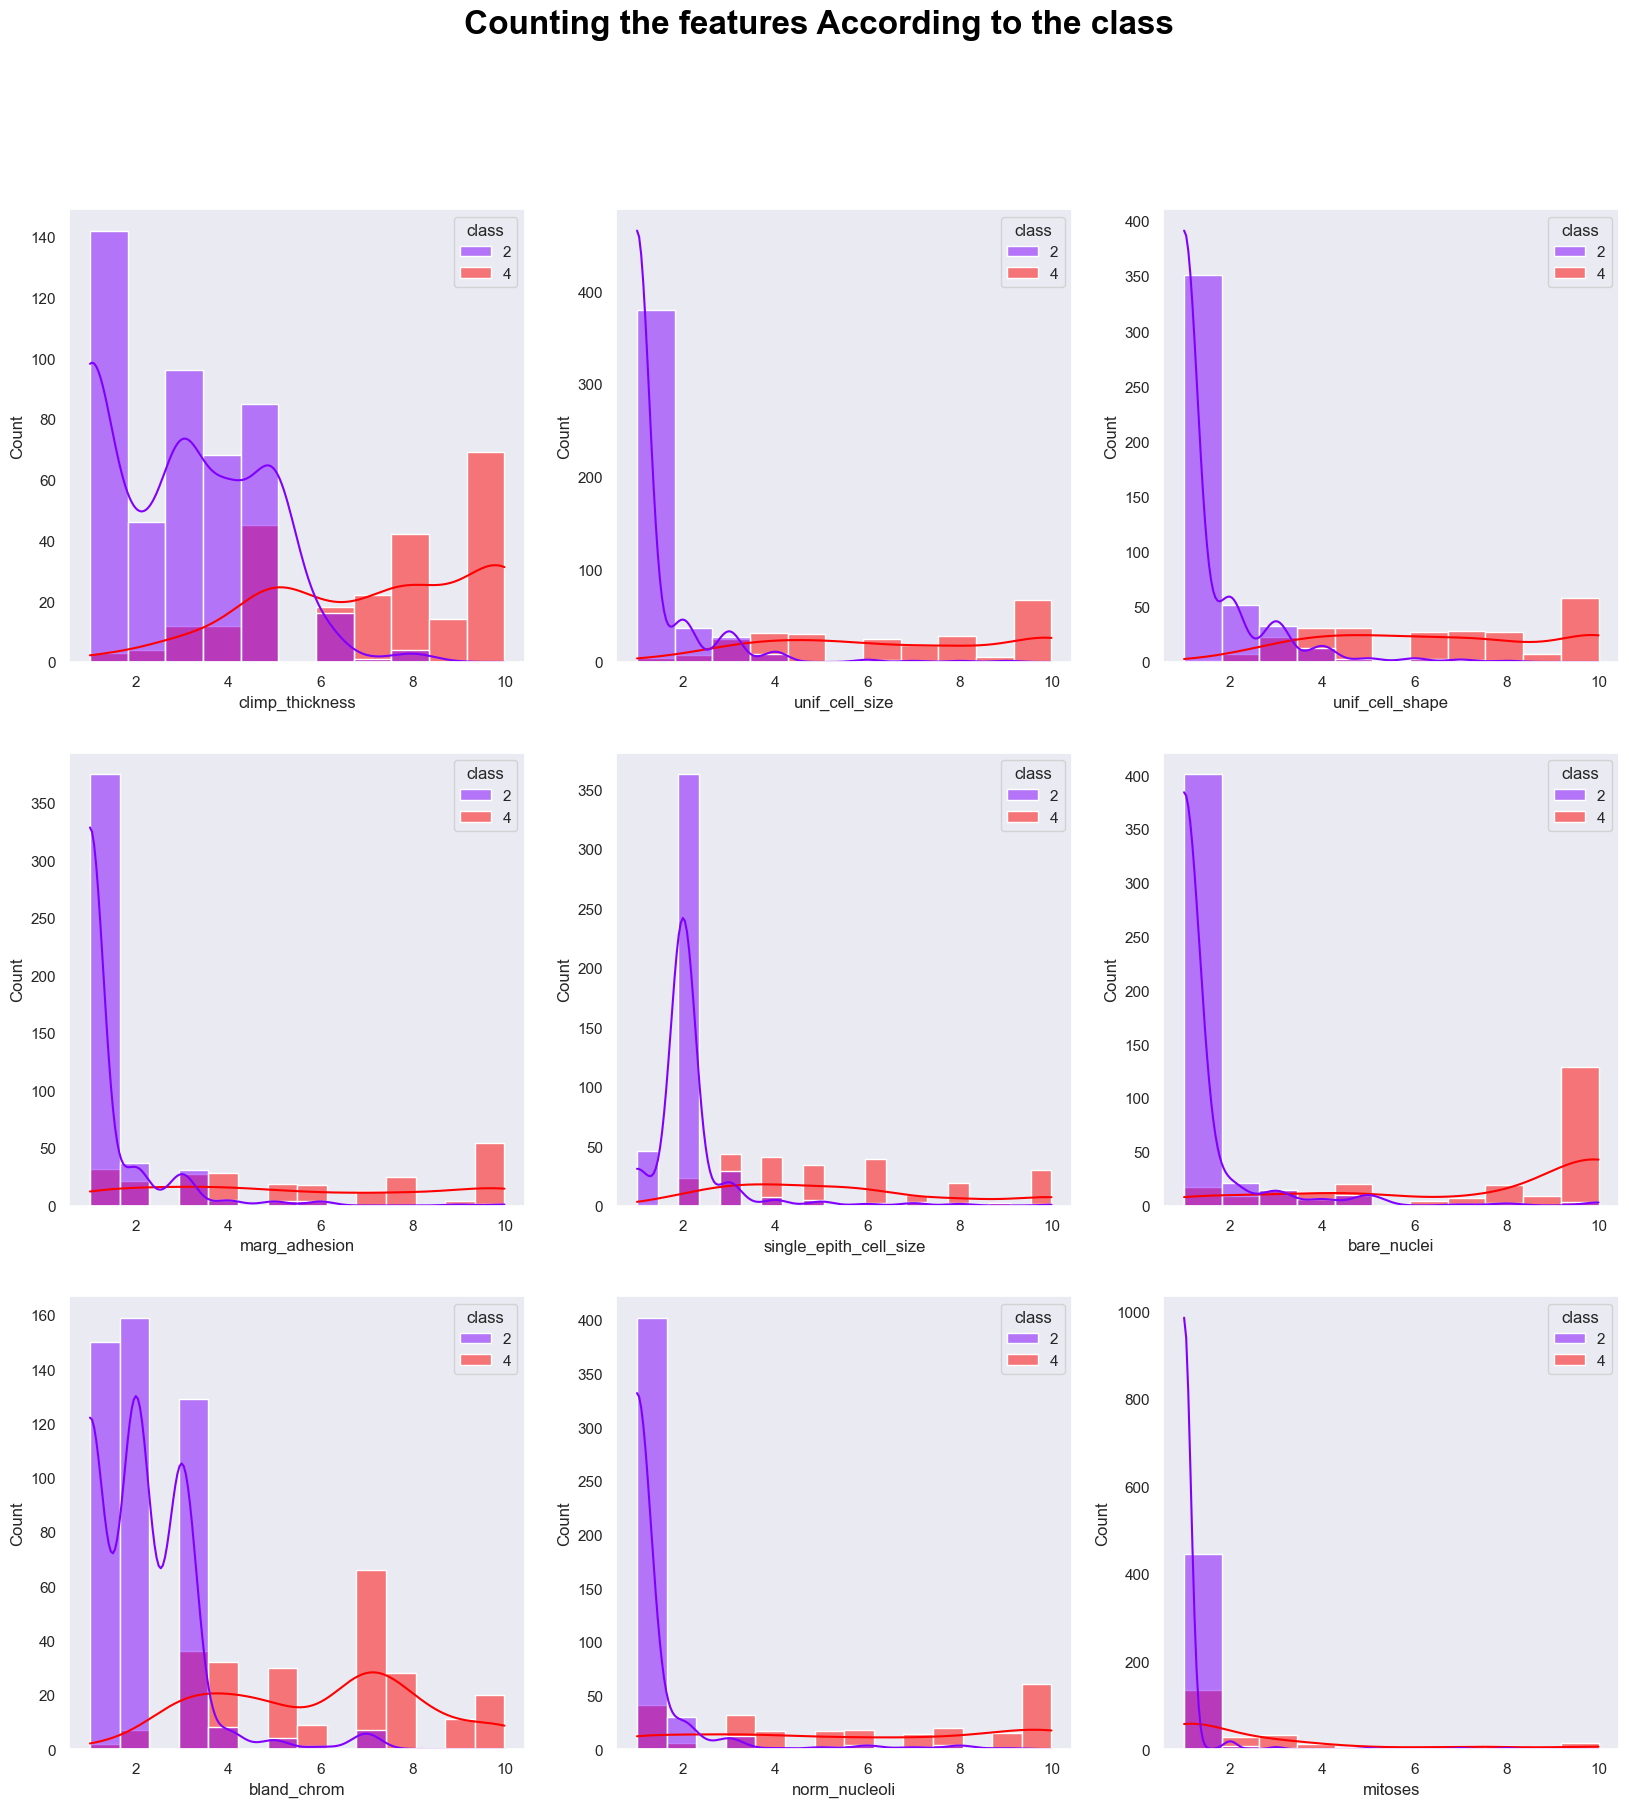

In [24]:
p=1
plt.figure(figsize=(20,20))
for i in df:
    if i=="class":
        pass
    else:
        plt.subplot(3,3,p)
        sns.histplot(data=df,x=i,color="green",hue="class",palette="rainbow",kde=True)
        p+=1
plt.suptitle("Counting the features According to the class",fontweight="bold",fontsize=24,color="black")
plt.show()

In [25]:
df.head()

,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [26]:
#Extract The target and Features from this dataset


In [27]:
x=df.drop("class",axis=1)
y=df[['class']]

In [28]:
x.head()

,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [29]:
y.T

,0,1,2,3,4,5,6,7,8,9,...,689,690,691,692,693,694,695,696,697,698
class,2,2,2,2,2,4,2,2,2,2,...,2,2,4,2,2,2,2,4,4,4


In [30]:
# Train Test Spliting the feature and Target for the Model tessting and Model Preapring for train

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56)

In [32]:
print("-"*110)
print(f"The shape of the x_train : {x_train.shape}")
print("-"*110)
print(f"The shape of the x_test : {x_test.shape}")
print("-"*110)
print(f"The shape of the y_train : {y_train.shape}")
print("-"*110)
print(f"The Shape of the y_test : {y_test.shape}")
print("-"*110)

--------------------------------------------------------------------------------------------------------------
The shape of the x_train : (559, 9)
--------------------------------------------------------------------------------------------------------------
The shape of the x_test : (140, 9)
--------------------------------------------------------------------------------------------------------------
The shape of the y_train : (559, 1)
--------------------------------------------------------------------------------------------------------------
The Shape of the y_test : (140, 1)
--------------------------------------------------------------------------------------------------------------


####  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
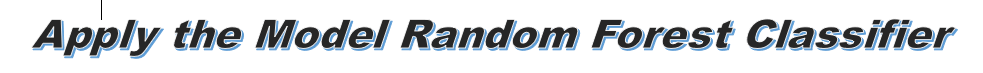
#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [33]:
rf= RandomForestClassifier(n_estimators=100,max_depth=1)
fits=rf.fit(x_train,y_train)
fits

RandomForestClassifier(max_depth=1)

In [34]:
print("-"*110)
pred=rf.predict(x_test)
print(f"Prediction of X_test by Random Forest :- \n {pred}")
print("-"*110)

--------------------------------------------------------------------------------------------------------------
Prediction of X_test by Random Forest :- 
 [4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4 2 4 4 2 2 2 2 4 2 2 4 2
 4 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 4 2 2 4 2 2 2 2 2 4 4 2
 4 2 2 2 2 2 2 2 2 2 2 4 4 2 4 4 4 2 2 4 2 4 4 4 2 2 4 4 2 2 2 2 4 2 4 2 4
 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 4 2 2 2 2 2 4 4 2 4 2 4 2]
--------------------------------------------------------------------------------------------------------------


In [35]:
ac=rf.score(x_test,y_test)
acc=rf.score(x_train,y_train)

In [36]:
print("-"*110)
print(f"The Accuracy of the test data is : {ac}")
print("-"*110)
print(f"The Accuracy of the train data is  : {acc}")
print("-"*110)

--------------------------------------------------------------------------------------------------------------
The Accuracy of the test data is : 0.95
--------------------------------------------------------------------------------------------------------------
The Accuracy of the train data is  : 0.962432915921288
--------------------------------------------------------------------------------------------------------------


In [37]:
cm=confusion_matrix(y_test,pred)
print("-"*110)
print(cm)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
[[95  4]
 [ 3 38]]
--------------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


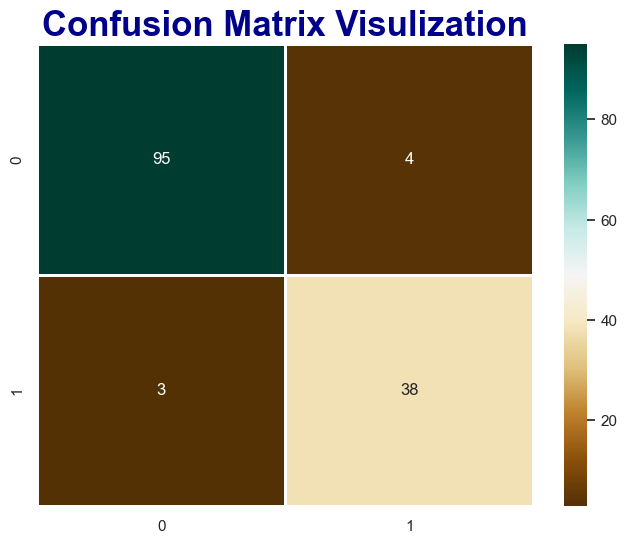

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


In [38]:
print("-"*110)
print("-"*110)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,linecolor="white",linewidths=2,cmap="BrBG")
plt.title("Confusion Matrix Visulization",fontweight="bold",fontsize=25,color="darkblue")
plt.show()
print("-"*110)
print("-"*110)

In [39]:
clr=classification_report(y_test,pred)
print("-"*110)
print(clr)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           2       0.97      0.96      0.96        99
           4       0.90      0.93      0.92        41

    accuracy                           0.95       140
   macro avg       0.94      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140

--------------------------------------------------------------------------------------------------------------


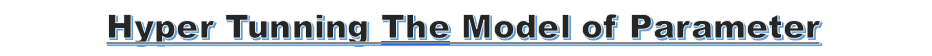

In [40]:
rff=RandomForestClassifier()
# p={"n_estimators":[45,55,75,85,100,110,120,125,135,145,155,160],
#   "min_samples_split":range(1,10),
#   "min_samples_leaf":range(1,10),
#   "criterion":["gini","entropy","log_loss"],
#   "max_features":["sqrt", "log2", None]
#   }
# p

In [41]:
p={"n_estimators":[75,85,100,110,120,125,135,145,155,160],
  "min_samples_split":range(1,5),
  "min_samples_leaf":range(1,5),
  "criterion":["gini","entropy","log_loss"],
  "max_features":["sqrt", "log2", None]
  }
p

{'n_estimators': [75, 85, 100, 110, 120, 125, 135, 145, 155, 160],
 'min_samples_split': range(1, 5),
 'min_samples_leaf': range(1, 5),
 'criterion': ['gini', 'entropy', 'log_loss'],
 'max_features': ['sqrt', 'log2', None]}

In [70]:
#  n_estimators=100,
#     *,
#     criterion='gini',
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_features='auto',
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     bootstrap=True,
#     oob_score=False,
#     n_jobs=None,
#     random_state=None,
#     verbose=0,
#     warm_start=False,
#     class_weight=None,
#     ccp_alpha=0.0,
#     max_samples=None,
# )

In [43]:
grd=GridSearchCV(estimator=rff,param_grid=p,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5),
                         'n_estimators': [75, 85, 100, 110, 120, 125, 135, 145,
                                          155, 160]})

In [48]:
grd.score(x_train,y_train)

0.9856887298747764

In [49]:
grd.score(x_test,y_test)

0.95

In [51]:
param=grd.best_params_

# After Hyperparameter Tunning

In [54]:
rfc=RandomForestClassifier(**param)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=4, min_samples_split=4,
                       n_estimators=155)

In [55]:
pred=rfc.predict(x_test)

In [57]:
print("_"*110)
print("_"*110)
print(pred)
print("_"*110)
print("_"*110)

______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
[4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4 2 4 4 2 2 2 2 4 2 2 4 2
 4 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 4 2 2 4 2 2 2 2 2 4 4 2
 4 2 2 2 2 2 2 2 2 2 2 4 4 2 4 4 4 2 2 4 2 4 2 4 2 2 4 4 2 2 2 2 4 2 4 2 4
 2 2 2 2 2 2 4 2 4 4 2 2 2 2 2 2 4 2 2 2 2 2 4 4 2 4 2 4 2]
______________________________________________________________________________________________________________
______________________________________________________________________________________________________________


In [59]:
accuracy=rfc.score(x_test,y_test)
accuracy2=rfc.score(x_train,y_train)

In [60]:
print("_"*110)
print("_"*110)
print(f"The Accuracy of the test data : {accuracy}")
print("_"*110)
print("_"*110)
print(f"The Accuracy of the Train data : {accuracy2}")
print("_"*110)
print("_"*110)

______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
The Accuracy of the test data : 0.95
______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
The Accuracy of the Train data : 0.9874776386404294
______________________________________________________________________________________________________________
______________________________________________________________________________________________________________


In [61]:
cm2=confusion_matrix(y_test,pred)

In [63]:
print("_"*110)
print(cm2)
print("_"*110)

______________________________________________________________________________________________________________
[[95  4]
 [ 3 38]]
______________________________________________________________________________________________________________


______________________________________________________________________________________________________________
______________________________________________________________________________________________________________


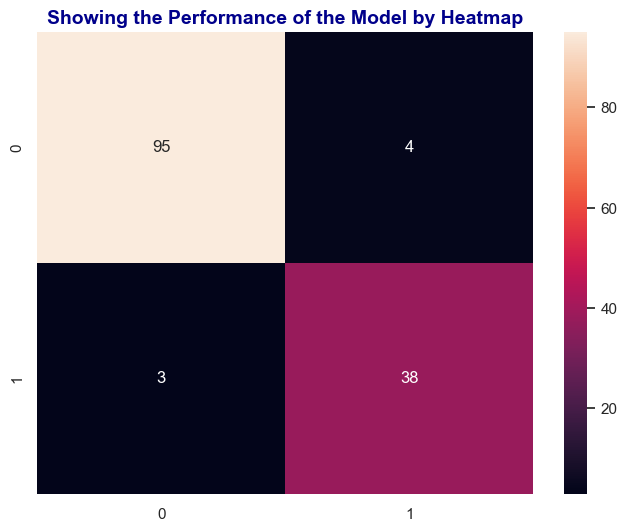

______________________________________________________________________________________________________________
______________________________________________________________________________________________________________


In [69]:
print("_"*110)
print("_"*110)
plt.figure(figsize=(8,6))
sns.heatmap(cm2,annot=True)
plt.title("Showing the Performance of the Model by Heatmap",fontweight="bold",fontsize=14,color="darkblue")
plt.show()
print("_"*110)
print("_"*110)

# Insights :

## A random forest classifier.

 A random forest is a meta estimator that fits a number of decision tree
 classifiers on various sub-samples of the dataset and uses averaging to
 improve the predictive accuracy and control over-fitting.
 The sub-sample size is controlled with the `max_samples` parameter if
 `bootstrap=True` (default), otherwise the whole dataset is used to build
 each tree.

1. Random forest is an ML ensemble algorithm based on aggregation of several decision trees. It is accurate, efficient, and relatively quick to create.
2. RF overcomes the drawbacks of the decision tree algorithm by reducing the overfitting of the dataset and improving accuracy.
3. Due to its simplicity of use and accuracy of results, it has been one of the most popular classification algorithms among data scientists for decades.
4. It is used in a variety of domains, such as finance and banking, e-commerce, healthcare, etc. The algorithm is employed to predict things like consumer activity, risks, stock prices, and the likelihood of developing disease symptoms.
5. Random forest classifiers handle large datasets. Since not all data needs to be processed, they work with random samples of data without sacrificing accuracy. Also, you can easily add or remove features from the model that are not useful for predicting your outcome variables.

# Benefits
1. Cost-effective. RF is much cheaper and faster to train when compared to neural networks. At the same time, it doesn’t suffer much in accuracy. For this reason, random forest modeling is used in mobile applications, for example.
2. Robust against overfitting. If one tree makes an inaccurate prediction due to an outlier in its training set, another will most likely compensate for that prediction with the opposite outlier. Thus, a set of uncorrelated trees performs better than any of the individual ones taken separately.
3. High coverage rates and low bias. The above makes random forest classifier ideal for situations where there may be some missing values in your dataset or if you want to understand how much variance there is between different types of data output (e.g., college undergraduates who are likely to finish their studies and leave, proceed to master’s degree, or drop out).
4. Applicable for classification and regression. RF has proven equally accurate results for both types of tasks.
5. Can handle missing values in features without introducing bias into predictions.
6. Easy to interpret. Every tree in the forest makes predictions independently

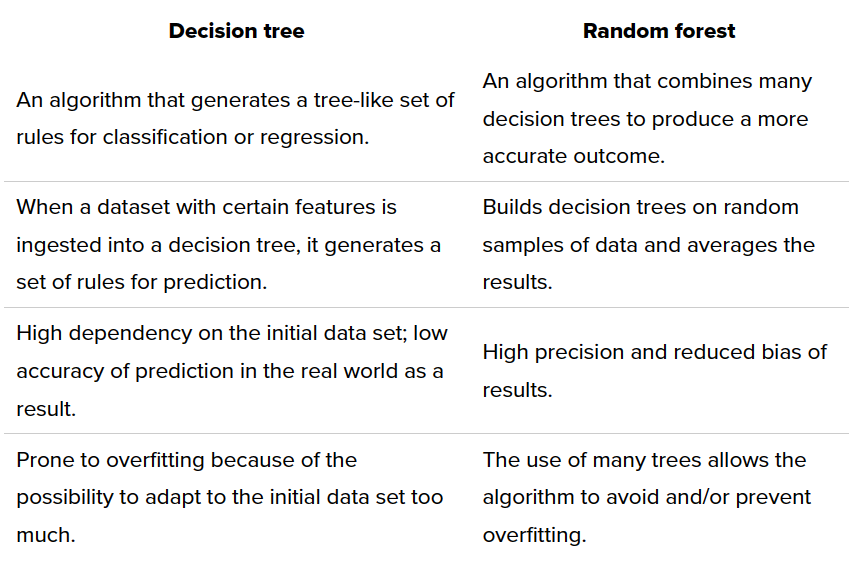

# Thanks for viewing my notebook 📝📝💫💫